

> Importing necessary libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline



> Read data 



In [16]:
df = pd.read_csv('secom.data', sep=" ", header=None)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432




> Count number of NAs for each column



In [18]:
nas = [df[x].isna().sum() for x in df.columns]
print(sorted(nas, reverse=True)[:25])
print(sum(nas))

[1429, 1429, 1429, 1429, 1341, 1341, 1341, 1341, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 949, 949, 949, 949, 794]
41951




> Read lables for the data



In [19]:
lables = pd.read_csv('secom_labels.data', sep=" ", header=None)



> Replace -1 with 0



In [20]:
lables = lables.replace(-1,0)

In [21]:
lables.head()

,0,1
0,0,19/07/2008 11:55:00
1,0,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,0,19/07/2008 14:43:00
4,0,19/07/2008 15:22:00


In [22]:
df.shape

(1567, 590)



> Substitute NAs with mean of that particular column



In [23]:
df = df.apply(lambda x: x.fillna(x.mean()), axis=0)

In [24]:
sum([df[x].isna().sum() for x in df.columns])

0



> Convert dataframe to numpy array



In [25]:
data = df.values



> Mean for each column



In [26]:
mean_data = np.mean(data.T, axis=1)



> Subtract means from each column



In [27]:
diff_data = data - mean_data



> Calculate covariance matrix



In [28]:
cov_mat = np.cov(diff_data.T)

In [29]:
cov_mat.shape

(590, 590)



> Comput Eigen values and Eigen vectors



In [30]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)



> Plot eigen values



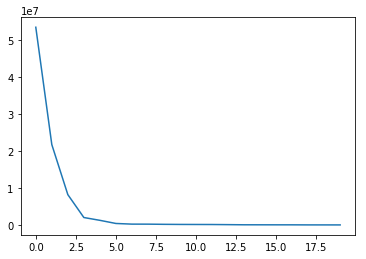

In [31]:
plt.plot(eig_val_cov[:20])

In [32]:
eig_vec_cov.shape

(590, 590)

In [33]:
eig_val_cov.shape

(590,)



> Get indexes of the sorted eigen values



In [34]:
idx = np.argsort(eig_val_cov)[::-1]

In [35]:
P = eig_vec_cov.T.dot(diff_data.T)

In [36]:
len(P)

590

In [37]:
np.var(P[0,:])

53381110.302403666

In [38]:
variances = np.array([np.var(P[x,:]) for x in range(P.shape[0])])

In [39]:
variances[:10]

array([53381110.30240367, 21732794.00299703,  8243112.81400468,
        2072557.38714381,  1314564.94654084,   467395.09304467,
         290677.93732237,   283487.5741031 ,   237004.48591036,
         208380.77019583])



> Plot the variances



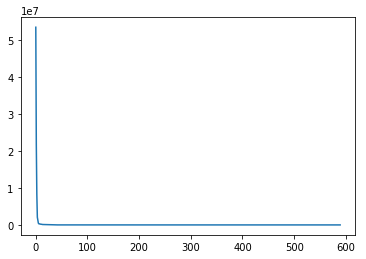

In [40]:
plt.plot(variances)
plt.show()

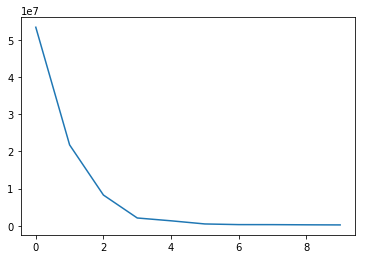

In [41]:
plt.plot(variances[:10])
plt.show()

5 is the saturation point